# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Novi Ken Sydney
- **Email:** m277b4kx3401@bangkit.academy
- **ID Dicoding:** novi_ken_sydney_m277b4kx3401_Kq1P

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap penggunaan sepeda?
- Bagaimana pola penggunaan sepeda pada hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [3]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime

## Data Wrangling

### Gathering Data

In [6]:
# Load dataset
df = pd.read_csv('/content/day.csv')

# Lihat 5 data teratas
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Dataset terdiri dari beberapa fitur terkait:

1.   cuaca (temp, atemp, hum, windspeed), waktu (dteday, season, weekday)
2.   jumlah pengguna sepeda (cnt, casual, registered)

### Assessing Data

In [7]:
# Menampilkan informasi tentang tipe data dan missing values
df.info()

# Statistik deskriptif
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing value, semua data terisi penuh.
- Kolom dteday harus diubah menjadi tipe datetime.

### Cleaning Data

In [8]:
# Mengubah kolom 'dteday' menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Cek data duplikat
df.duplicated().sum()


0

**Insight:**
- Data sudah bersih dan tidak ada duplikat.


## Exploratory Data Analysis (EDA)

### Explore Pengaruh Cuaca terhadap Penggunaan Sepeda

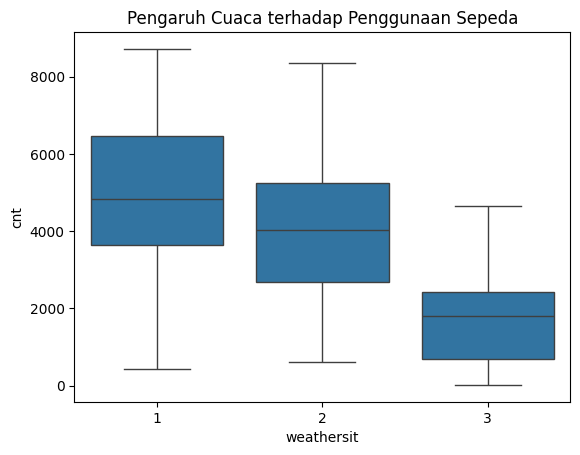

In [9]:
# Boxplot penggunaan sepeda berdasarkan cuaca
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.show()


**Insight:**
- Cuaca cerah dan berawan lebih mendorong penggunaan sepeda, sementara cuaca buruk mengurangi jumlah pengguna.

### Explore Pola Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan

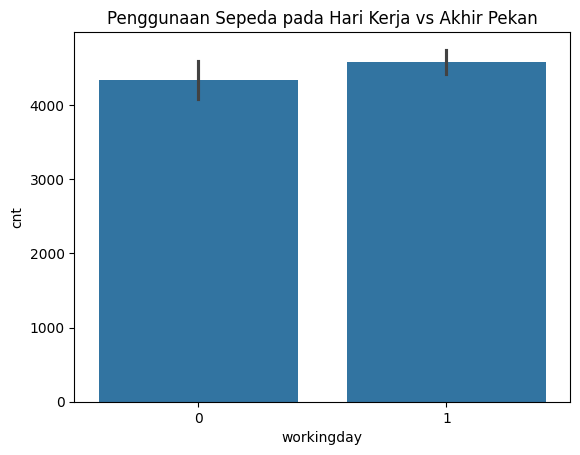

In [10]:
# Barplot penggunaan sepeda berdasarkan hari kerja vs akhir pekan
sns.barplot(x='workingday', y='cnt', data=df)
plt.title('Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh cuaca terhadap penggunaan sepeda?



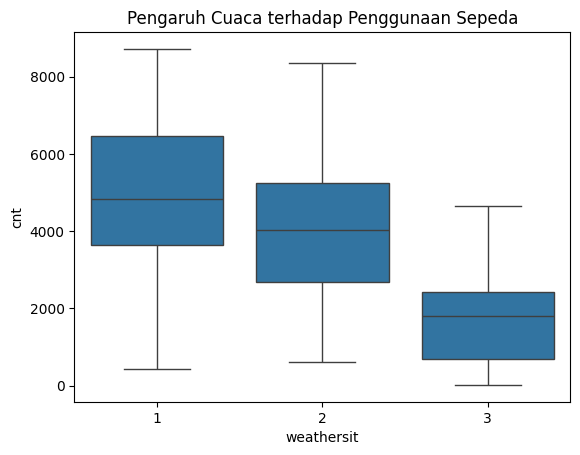

In [11]:
# Visualisasi pengaruh cuaca
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.show()


### Pertanyaan 2:

Bagaimana pola penggunaan sepeda pada hari kerja vs akhir pekan?

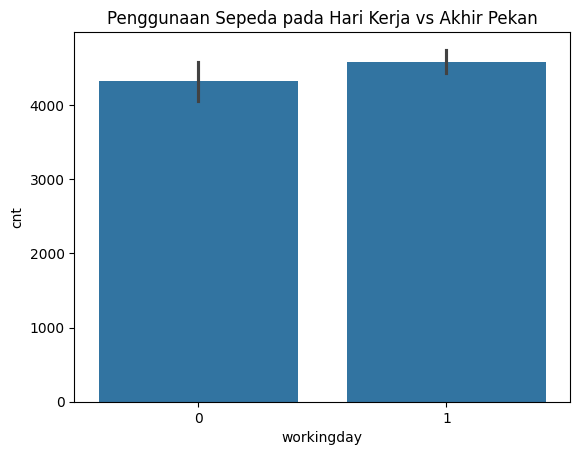

In [12]:
# Visualisasi pola penggunaan sepeda pada hari kerja dan akhir pekan
sns.barplot(x='workingday', y='cnt', data=df)
plt.title('Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan')
plt.show()


**Insight:**
- Pengguna cenderung lebih banyak menggunakan sepeda ketika cuaca baik.
- Penggunaan sepeda lebih tinggi di hari kerja, yang mungkin menunjukkan sepeda digunakan untuk perjalanan menuju tempat kerja atau sekolah.

## Analisis Lanjutan (Opsional)

RFM Analysis

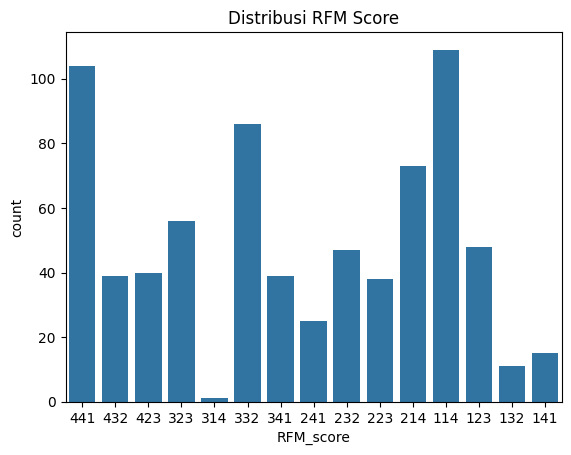

In [13]:
# Mengonversi dteday menjadi format datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Menghitung Recency, Frequency, dan Monetary
df['recency'] = (df['dteday'].max() - df['dteday']).dt.days
df['monetary'] = df['cnt']

# Frequency dihitung per hari
frequency = df.groupby('dteday').agg({'cnt': 'sum'}).reset_index()

# Segmentasi RFM
df['R_score'] = pd.qcut(df['recency'], 4, labels=[1, 2, 3, 4])
df['F_score'] = pd.qcut(df['cnt'], 4, labels=[4, 3, 2, 1])
df['M_score'] = pd.qcut(df['monetary'], 4, labels=[1, 2, 3, 4])
df['RFM_score'] = df['R_score'].astype(str) + df['F_score'].astype(str) + df['M_score'].astype(str)

# Visualisasi RFM Score
sns.countplot(x='RFM_score', data=df)
plt.title('Distribusi RFM Score')
plt.show()


Clustering (Manual Grouping/Binning)

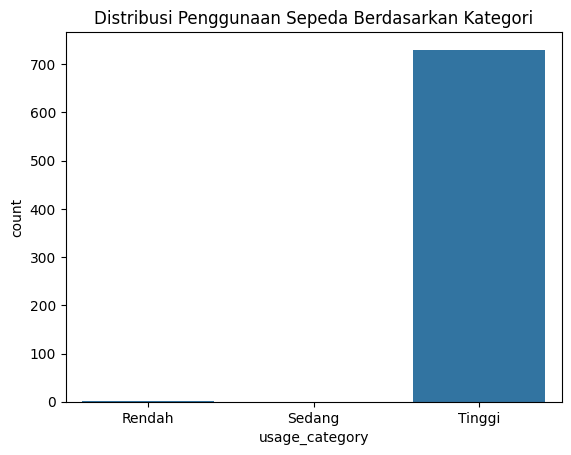

In [14]:
# Membuat bins berdasarkan jumlah penggunaan sepeda
bins = [0, 100, 300, df['cnt'].max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['usage_category'] = pd.cut(df['cnt'], bins=bins, labels=labels)

# Visualisasi distribusi penggunaan sepeda berdasarkan kategori
sns.countplot(x='usage_category', data=df)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Kategori')
plt.show()


## Conclusion

- Cuaca sangat mempengaruhi penggunaan sepeda, di mana cuaca cerah mendorong lebih banyak orang menggunakan sepeda.

- Penggunaan sepeda lebih tinggi pada hari kerja, menunjukkan kemungkinan besar digunakan untuk perjalanan rutin seperti ke kantor atau sekolah.